# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini Project: Face Mask Detection using Convolutional Neural Networks

## Learning Objectives

At the end of the experiment, you will be able to :

* load the image dataset using ImageDataGenerator from the path directory
* perform data augmentation on the fly and create  batches of the dataset
* build the convolutional neural networks for classification problem
* visualize & interpret what CNN layers learn
* use the transfer learning (pre-trained models) for classification problems

## Introduction

This project uses a Deep Neural Network, more specifically a Convolutional Neural Network, to differentiate between images of people, with masks, without masks and incorrectly placed masks. Manually built and pretrained networks will be used to perform this classification task.

**Face-Mask-Detection-Using-CNN**

* Outbreak of the Coronavirus pandemic has created various changes in the lifestyle of everyone around the world.
* Among these changes, wearing a mask has been very vital to every individual.
* Detection of people who are not wearing masks is a challenge due to the large populations.
* This face mask detection project can be used in schools, hospitals, banks, airports etc as a digitalized scanning tool.
  - The technique of detecting people’s faces and segregating them into three classes namely the people with masks and people without masks and partial masks is done with the help of image processing and deep learning.
* With the help of this project, a person who is monitoring the face mask status for a particular firm can be seated in a remote area and still monitor efficiently and give instructions accordingly.

![img](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/dataset-images-with-mask.jpg)

## Dataset

The data for this mini-project is collected from various sources including the masked images from internet and general frontal face images considered as without mask. This dataset consists of 5029 train images and 1059 test images with 3 classes `with_mask`, `without_mask` and `partial_mask`

Many people are not correctly wearing their masks due to bad practices, bad behaviors or vulnerability of individuals (e.g., children, old people). For these reasons, several mask wearing campaigns intend to sensitize people about this problem and good practices. In this sense, this work proposes three types of masked face detection dataset
  
- Without Mask/ With Mask/ Partial Mask
  
Note that this dataset contains some annotated (artificially generated) masks to augment the 'masked' data category.

## Problem Statement

To build and implement a Convolutional Neural Network model to classify between masked/unmasked/partially masked faces.

In [1]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/MP2_FaceMask_Dataset.zip
!unzip -qq MP2_FaceMask_Dataset.zip
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


## Grading = 10 Points

### Import Required packages

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import PIL
from matplotlib import pyplot as plt
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow as tf
from tensorflow import keras
import glob, os

# Part-A [5-Marks]

### Analyzing the shape and distribution of datasets [1 Mark]

Store the list of the paths from the training dataset for images of partial-mask, with_mask, and without_mask in variables partial, on, and off respectively. Hint : [Check the 'glob' section.](https://realpython.com/working-with-files-in-python/)

In [3]:
# YOUR CODE HERE
import glob
import os

# Define the root directory of the dataset for Train
root_dir_train = 'MP2_FaceMask_Dataset/train/'

# Store the paths of images for each class in respective variables
mask_partial_train = glob.glob(os.path.join(root_dir_train, 'partial_mask', '*.jpg'))
mask_on_train = glob.glob(os.path.join(root_dir_train, 'with_mask', '*.jpg'))
mask_off_train = glob.glob(os.path.join(root_dir_train, 'without_mask', '*.jpg'))

# Print the number of images in each category to verify
print(f"Partial Mask Images: {len(mask_partial_train)}")
print(f"With Mask Images: {len(mask_on_train)}")
print(f"Without Mask Images: {len(mask_off_train)}")

# Print the first 5 paths from each category (if there are enough images)
print("\nFirst 5 images with partial mask:")
print(mask_partial_train[:5])

print("\nFirst 5 images with mask:")
print(mask_on_train[:5])

print("\nFirst 5 images without mask:")
print(mask_off_train[:5])



Partial Mask Images: 1294
With Mask Images: 1523
Without Mask Images: 2127

First 5 images with partial mask:
['MP2_FaceMask_Dataset/train/partial_mask/68737_Mask_Chin.jpg', 'MP2_FaceMask_Dataset/train/partial_mask/68664_Mask_Mouth_Chin.jpg', 'MP2_FaceMask_Dataset/train/partial_mask/68219_Mask_Mouth_Chin.jpg', 'MP2_FaceMask_Dataset/train/partial_mask/68193_Mask_Mouth_Chin.jpg', 'MP2_FaceMask_Dataset/train/partial_mask/51363_Mask_Mouth_Chin.jpg']

First 5 images with mask:
['MP2_FaceMask_Dataset/train/with_mask/augmented_image_35.jpg', 'MP2_FaceMask_Dataset/train/with_mask/novissimas (121).jpg', 'MP2_FaceMask_Dataset/train/with_mask/imagen_m_on222.jpg', 'MP2_FaceMask_Dataset/train/with_mask/novissimas (142).jpg', 'MP2_FaceMask_Dataset/train/with_mask/8-with-mask.jpg']

First 5 images without mask:
['MP2_FaceMask_Dataset/train/without_mask/augmented_image_35.jpg', 'MP2_FaceMask_Dataset/train/without_mask/143.jpg', 'MP2_FaceMask_Dataset/train/without_mask/284.jpg', 'MP2_FaceMask_Dataset/t

Store paths of all three types of images in one variable. Check and store the height and width of each image.

Hint: Use PIL(PIL.Image.open) library to open the image from the path, convert it into a NumPy array and check for shape.  

In [4]:
# YOUR CODE HERE
from PIL import Image
import numpy as np
# Combine all paths into one list
all_paths_train = mask_partial_train + mask_on_train + mask_off_train

# Initialize a list to store image dimensions
image_dimensions_train = []

# Loop through each image path to open the image and check its shape - Train
for img_path in all_paths_train:
    # Open the image using PIL
    img = Image.open(img_path)

    # Convert the image to a NumPy array
    img_array = np.array(img)

    # Get the shape (height, width, channels)
    height, width, channels = img_array.shape  # Assumes the image is RGB or RGBA

    # Store the image dimensions
    image_dimensions_train.append((img_path, height, width, channels))

#Output
# Print the number of images in each category to verify
print(f"Images for train: {len(image_dimensions_train)}")
img_array.shape




Images for train: 4944


(160, 160, 3)

In [5]:
# YOUR CODE HERE
# Print the first 5 image paths and their dimensions - Train
for i in range(min(5, len(image_dimensions_train))):
    print(f"Image Path: {image_dimensions_train[i][0]}")
    print(f"Height: {image_dimensions_train[i][1]}, Width: {image_dimensions_train[i][2]}, Channels: {image_dimensions_train[i][3]}")
    print("-" * 30)




Image Path: MP2_FaceMask_Dataset/train/partial_mask/68737_Mask_Chin.jpg
Height: 1024, Width: 1024, Channels: 3
------------------------------
Image Path: MP2_FaceMask_Dataset/train/partial_mask/68664_Mask_Mouth_Chin.jpg
Height: 1024, Width: 1024, Channels: 3
------------------------------
Image Path: MP2_FaceMask_Dataset/train/partial_mask/68219_Mask_Mouth_Chin.jpg
Height: 1024, Width: 1024, Channels: 3
------------------------------
Image Path: MP2_FaceMask_Dataset/train/partial_mask/68193_Mask_Mouth_Chin.jpg
Height: 1024, Width: 1024, Channels: 3
------------------------------
Image Path: MP2_FaceMask_Dataset/train/partial_mask/51363_Mask_Mouth_Chin.jpg
Height: 1024, Width: 1024, Channels: 3
------------------------------


Discuss the distribution of images. Calculate and display max, min and average of height and width of all images.

In [6]:
# YOUR CODE HERE
from PIL import Image
import numpy as np

# Combine all paths into one list
all_paths_train = mask_partial_train + mask_on_train + mask_off_train


# Initialize a list to store image dimensions
image_dimensions_train = []


heights_train = []
widths_train = []

# Loop through each image path to open the image and check its shape - Train
for img_path in all_paths_train:
    # Open the image using PIL
    img = Image.open(img_path)

    # Check the number of channels and unpack the shape accordingly
    img_array = np.array(img)
    height, width, channels = img_array.shape

    # Store the image dimensions
    image_dimensions_train.append((img_path, height, width, channels))
    heights_train.append(height)
    widths_train.append(width)

# Output the number of images in each category to verify
print(f"Images for train: {len(image_dimensions_train)}")



# Calculate the maximum, minimum, and average height and width - train
max_height_train = np.max(heights_train)
min_height_train = np.min(heights_train)
avg_height_train = np.mean(heights_train)

max_width_train = max(widths_train)
min_width_train = min(widths_train)
avg_width_train = sum(widths_train) / len(widths_train)

# Display the results
print("Image Distribution for Train Data (Height and Width):")
print(f"Max Height : {max_height_train}, Min Height: {min_height_train}, Average Height: {avg_height_train:.2f}")
print(f"Max Width: {max_width_train}, Min Width: {min_width_train}, Average Width: {avg_width_train:.2f}")

Images for train: 4944
Image Distribution for Train Data (Height and Width):
Max Height : 4608, Min Height: 141, Average Height: 453.79
Max Width: 3456, Min Width: 110, Average Width: 438.49


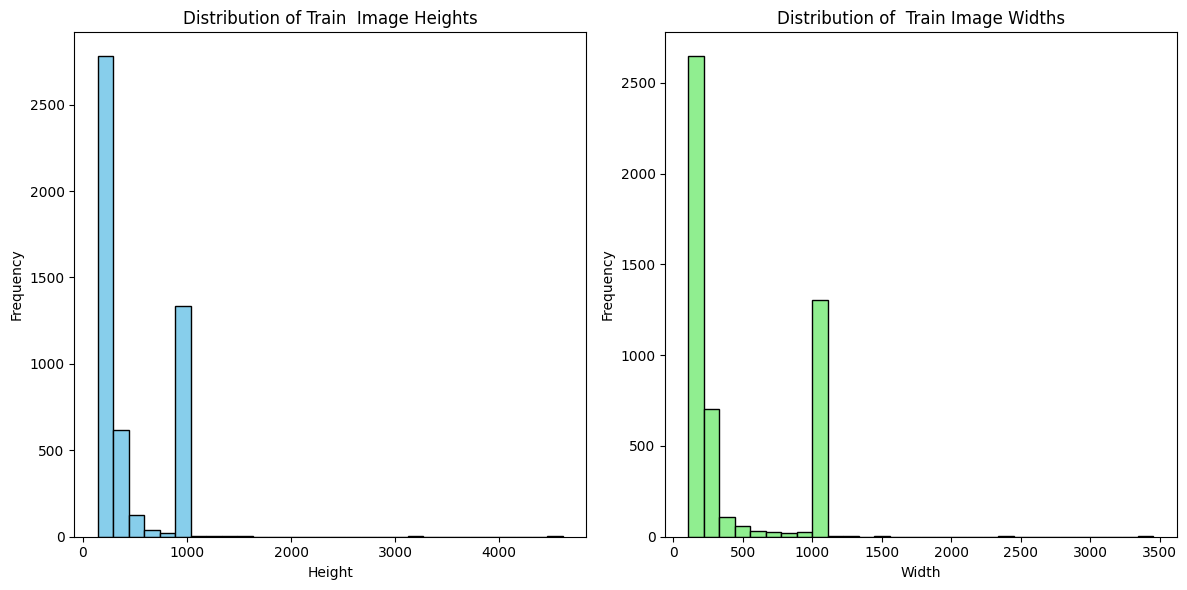

In [7]:
# Plot the distribution of heights
plt.figure(figsize=(12, 6))
# Plot heights
plt.subplot(1, 2, 1)
plt.hist(heights_train, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Train  Image Heights")
plt.xlabel("Height")
plt.ylabel("Frequency")

# Plot widths
plt.subplot(1, 2, 2)
plt.hist(widths_train, bins=30, color='lightgreen', edgecolor='black')
plt.title("Distribution of  Train Image Widths")
plt.xlabel("Width")
plt.ylabel("Frequency")

# Show the plots
plt.tight_layout()
plt.show()

### Visualize the sample images of each class before augmentation [1 Mark]

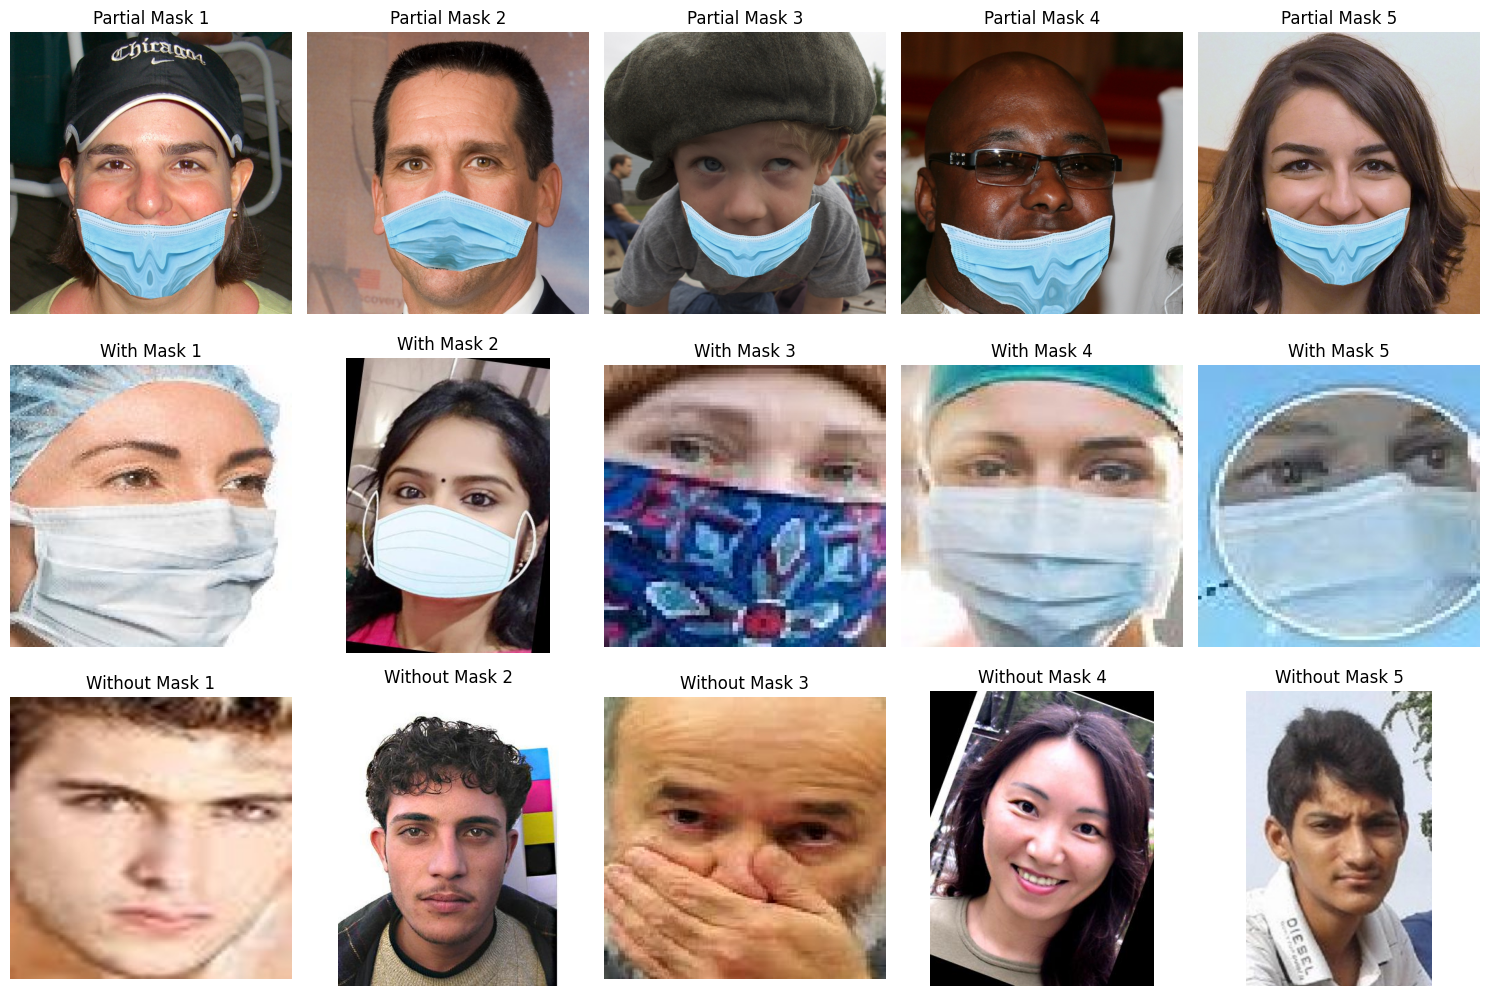

In [8]:
# YOUR CODE HERE
import random


# Example image paths for each class (replace these with your actual lists)
partial_paths = mask_partial_train  # List of paths for partial mask images
on_paths = mask_on_train  # List of paths for with mask images
off_paths = mask_off_train  # List of paths for without mask images

# Number of samples to visualize from each class
num_samples = 5

# Randomly select sample images from each class
sample_partial = random.sample(partial_paths, num_samples)
sample_on = random.sample(on_paths, num_samples)
sample_off = random.sample(off_paths, num_samples)

# Create a figure for plotting
fig, axes = plt.subplots(3, num_samples, figsize=(15, 10))

# Display partial mask images
for i, img_path in enumerate(sample_partial):
    img = Image.open(img_path)
    axes[0, i].imshow(img)
    axes[0, i].axis('off')
    axes[0, i].set_title(f"Partial Mask {i+1}")

# Display with mask images
for i, img_path in enumerate(sample_on):
    img = Image.open(img_path)
    axes[1, i].imshow(img)
    axes[1, i].axis('off')
    axes[1, i].set_title(f"With Mask {i+1}")

# Display without mask images
for i, img_path in enumerate(sample_off):
    img = Image.open(img_path)
    axes[2, i].imshow(img)
    axes[2, i].axis('off')
    axes[2, i].set_title(f"Without Mask {i+1}")

# Adjust layout
plt.tight_layout()
plt.show()


### Load the images using ImageDataGenerator [1 Mark]

There are two main steps involved in creating the generator.
1. Instantiate ImageDataGenerator with required arguments to create an object
2. Use the `flow_from_directory` command depending on how your data is stored on disk. This is the command that will allow you to generate and get access to batches of data on the fly.

Hint: [link](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [9]:
TRAINING_DIR = "/content/MP2_FaceMask_Dataset/train/"
VALIDATION_DIR = "/content/MP2_FaceMask_Dataset/test/"

In [25]:
# YOUR CODE HERE
# Instantiate the ImageDataGenerator with rescaling and augmentation options
'''train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,       # Rescaling pixel values to the range [0, 1]
    shear_range=0.2,         # Shear (tilt) the image
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True     # Flip images horizontally
)'''
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Scale pixel values to [0, 1]
    rotation_range=20,         # Random rotation within 20 degrees
    width_shift_range=0.2,     # Random horizontal shift by 20%
    height_shift_range=0.2,    # Random vertical shift by 20%
    shear_range=0.2,           # Random shear transformation
    zoom_range=0.2,            # Random zoom by 20%
    horizontal_flip=True,      # Random horizontal flip
    brightness_range=[0.8, 1.2] # Random brightness adjustment
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescaling for test data

# Load training data using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,                          # Directory with training data
    target_size=(224, 224),              # Resize images to 224x224 (or another size you prefer)
    batch_size=32,                       # Number of images per batch
    class_mode='categorical',            # Type of label encoding (e.g., 'binary' or 'categorical')
    shuffle=True,                        # Shuffle data before each epoch
    seed=42                              # Random seed for reproducibility
    #subset = 'training'
)

# Load test data using flow_from_directory (without augmentation)
test_generator = test_datagen.flow_from_directory(
    VALIDATION_DIR,                           # Directory with test data
    target_size=(224, 224),             # Resize images to 224x224 (same as training)
    batch_size=32,                      # Number of images per batch
    class_mode='categorical',           # Class labels encoded as one-hot vectors
    shuffle=False,                      # Do not shuffle test data
    seed=42,                             # Random seed for reproducibility
    #subset = 'validation'
)

for class_name in os.listdir(TRAINING_DIR):
    print(f"Train class: {class_name}, Samples: {len(os.listdir(os.path.join(TRAINING_DIR, class_name)))}")

for class_name in os.listdir(VALIDATION_DIR):
    print(f"Validation class: {class_name}, Samples: {len(os.listdir(os.path.join(VALIDATION_DIR, class_name)))}")


Found 5029 images belonging to 3 classes.
Found 1259 images belonging to 3 classes.
Train class: without_mask, Samples: 2138
Train class: with_mask, Samples: 1624
Train class: partial_mask, Samples: 1294
Validation class: without_mask, Samples: 534
Validation class: with_mask, Samples: 406
Validation class: partial_mask, Samples: 323


Check class indices

In [11]:
# YOUR CODE HERE
# Print the class labels and the number of images in each class
print(f"Classes in the training data: {train_generator.class_indices}")
print(f"Classes in the test data: {test_generator.class_indices}")

Classes in the training data: {'partial_mask': 0, 'with_mask': 1, 'without_mask': 2}
Classes in the test data: {'partial_mask': 0, 'with_mask': 1, 'without_mask': 2}


Check the shape of the image from train_generator

In [12]:
# YOUR CODE HERE
# Check the batch size and shape of one batch of data - Train
images, labels = next(train_generator)  # Use next() instead of next() method
print(f"Shape of a batch of images: {images.shape}")
print(f"Shape of a batch of labels: {labels.shape}")


Shape of a batch of images: (32, 224, 224, 3)
Shape of a batch of labels: (32, 3)


In [13]:
# YOUR CODE HERE
# Now, check the shape of each individual image in the batch
for i in range(images.shape[0]):  # Iterate over the batch
    print(f"Shape of image {i+1}: {images[i].shape}")

Shape of image 1: (224, 224, 3)
Shape of image 2: (224, 224, 3)
Shape of image 3: (224, 224, 3)
Shape of image 4: (224, 224, 3)
Shape of image 5: (224, 224, 3)
Shape of image 6: (224, 224, 3)
Shape of image 7: (224, 224, 3)
Shape of image 8: (224, 224, 3)
Shape of image 9: (224, 224, 3)
Shape of image 10: (224, 224, 3)
Shape of image 11: (224, 224, 3)
Shape of image 12: (224, 224, 3)
Shape of image 13: (224, 224, 3)
Shape of image 14: (224, 224, 3)
Shape of image 15: (224, 224, 3)
Shape of image 16: (224, 224, 3)
Shape of image 17: (224, 224, 3)
Shape of image 18: (224, 224, 3)
Shape of image 19: (224, 224, 3)
Shape of image 20: (224, 224, 3)
Shape of image 21: (224, 224, 3)
Shape of image 22: (224, 224, 3)
Shape of image 23: (224, 224, 3)
Shape of image 24: (224, 224, 3)
Shape of image 25: (224, 224, 3)
Shape of image 26: (224, 224, 3)
Shape of image 27: (224, 224, 3)
Shape of image 28: (224, 224, 3)
Shape of image 29: (224, 224, 3)
Shape of image 30: (224, 224, 3)
Shape of image 31: 

### Visualize a few sample images using data generator [1 Mark]

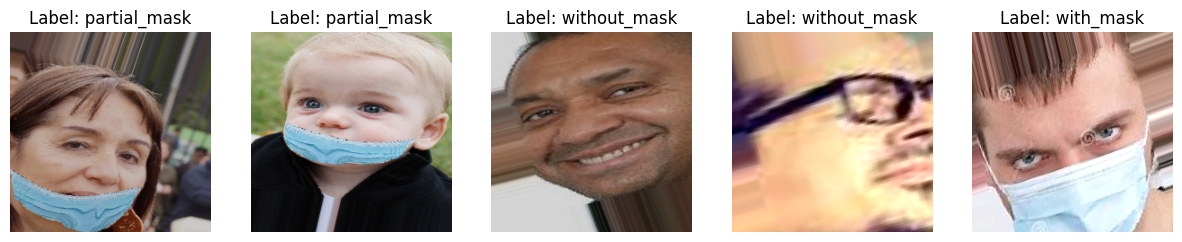

In [14]:
# YOUR CODE HERE
# Fetch one batch from the train_generator
x_train, y_train = next(train_generator)

# Number of images to display
num_images_to_display = 5

# Plot the first 'num_images_to_display' images from the batch
plt.figure(figsize=(15, 15))  # Adjust the figure size
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i+1)  # Create subplots in a 1-row grid
    plt.imshow(x_train[i])  # Display the i-th image
    plt.axis('off')  # Turn off axis for better visualization
    # If labels are available, display class names
    class_idx = y_train[i].argmax()  # Get the class index (one-hot encoded)
    class_names = list(train_generator.class_indices.keys())  # Class names from the generator
    plt.title(f"Label: {class_names[class_idx]}")

plt.show()

In [ ]:
#Optional Approach


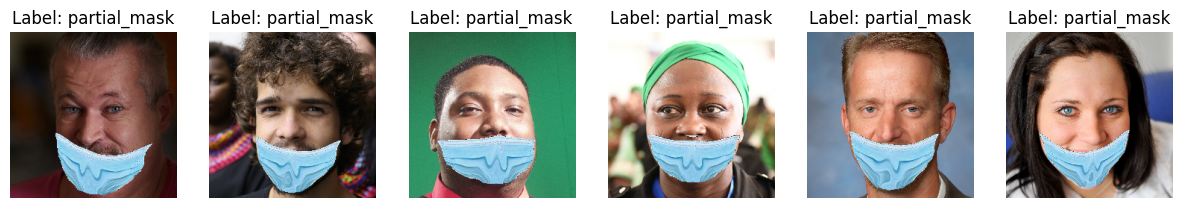

In [15]:
#Optional
# YOUR CODE HERE
# Fetch one batch from the test_generator
x_test, y_test = next(test_generator)

# Number of images to display
num_images_to_display = 6

# Plot the first 'num_images_to_display' images from the batch
plt.figure(figsize=(15, 15))  # Adjust the figure size
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i+1)  # Create subplots in a 1-row grid
    plt.imshow(x_test[i])  # Display the i-th image
    plt.axis('off')  # Turn off axis for better visualization
    # If labels are available, display class names
    class_idx = y_test[i].argmax()  # Get the class index (one-hot encoded)
    class_names = list(test_generator.class_indices.keys())  # Class names from the generator
    plt.title(f"Label: {class_names[class_idx]}")

plt.show()

## Build the CNN model using Keras [1 Mark]



**Convolutional Neural Network:** A neural network in which at least one layer is a convolutional layer. A typical convolutional neural network consists of some combination of the following layers:

* convolutional layers
* pooling layers
* dense layers


**Conv2D**  

Passing an image with input shape of 3-D and to calculate the output:

 $O = \frac{n - f + 2p}{s} + 1$

 where

 $n$ = image dimension

 $f$ = filter size

 $p$ = padding

 $s$ = stride

**MaxPool**

The resulting output, when using the "valid" padding option, has a spatial shape (number of rows or columns) of:

O = `math.floor`$(\frac{input shape - pool size)}{ strides}) + 1$ (when input shape >= pool size)

The resulting output shape when using the "same" padding option is:

O = `math.floor`$(\frac{input shape - 1}{strides}) + 1$

by default, stride = None, so stride is same as pool size

Task-flow
* Initialize the network of convolution, maxpooling and dense layers
* Define the optimizer and loss functions
* Fit the model and evaluate the model

**model 1 with 2 convolutional (feature representation) and 2 maxpool layers (down sampling) and 2 dense layers for classification.**

In [16]:
#model1 = Sequential([
    # YOUR CODE HERE          #convolutional layer 1: No. of filters=100, filter size=3x3, activation = relu, input_shap = 224x224x3,
    # YOUR CODE HERE                                                         #Maxpooling2D filter size=2x2

   # YOUR CODE HERE                                  #convolutional layer 2: No. of filters=100, filter size=3x3, activation = relu,
   # YOUR CODE HERE                                                         #Maxpooling2D filter size=2x2

# YOUR CODE HERE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model1 = Sequential()

# First convolutional layer
model1.add(Conv2D(100, (3, 3), activation='relu', input_shape=(224, 224, 3)))  # 32 filters, 3x3 kernel
model1.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling with a 2x2 pool size

# Second convolutional layer
model1.add(Conv2D(100, (3, 3), activation='relu'))  # 64 filters, 3x3 kernel
model1.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling with a 2x2 pool size

# Flatten the output from the last max pooling layer
model1.add(Flatten())


# Fully connected layer (dense layer)
model1.add(Dense(128, activation='relu'))  # 128 neurons in the dense layer

# Output layer with softmax activation for multi-class classification
model1.add(Dense(train_generator.num_classes, activation='softmax'))  # Number of output classes

'''
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),  # Adjust based on the flattened size
    Dense(3, activation='softmax')  # For 3 classes
])'''

# Step 3: Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# YOUR CODE HERE
#Note: Applying a convolution to an image will make it smaller (if no padding).
#Convolving a 3x3 filter over images means we’ll lose a single pixel on all sides (2 in total).
#In the given case, sliding a 3x3 filter over a 224x224 image results in a 222x222 image
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 100)       │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 100)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 100)       │          90,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 291600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      37,324,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,418,215 (142.74 MB)

 Trainable params: 37,418,215 (142.74 MB)

 Non-trainable params: 0 (0.00 B)

Fit the data to the model

In [18]:
# YOUR CODE HERE
# Train the model using the data from the generators
history = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Number of batches per epoch
    epochs=10,  # Number of epochs to train
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size  # Number of batches per validation step
)




Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 104s 580ms/step - accuracy: 0.6521 - loss: 1.4735 - val_accuracy: 0.9199 - val_loss: 0.2717
Epoch 2/10
  1/157 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - accuracy: 0.8438 - loss: 0.4212

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8438 - loss: 0.4212 - val_accuracy: 0.9091 - val_loss: 0.1544
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 90s 551ms/step - accuracy: 0.8744 - loss: 0.3338 - val_accuracy: 0.9335 - val_loss: 0.2177
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.9062 - loss: 0.3930 - val_accuracy: 1.0000 - val_loss: 0.1212
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 89s 545ms/step - accuracy: 0.8973 - loss: 0.2993 - val_accuracy: 0.9327 - val_loss: 0.1816
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 151us/step - accuracy: 0.9062 - loss: 0.3391 - val_accuracy: 0.8182 - val_loss: 0.2020
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 90s 542ms/step - accuracy: 0.9050 - loss: 0.2654 - val_accuracy: 0.9503 - val_loss: 0.1688
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9688 - loss: 0.1363 - val_accuracy: 0.8182 - val_loss: 0.1901
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 139s 537ms/step - accuracy: 0.9243 - loss: 0.2094 - val_accur

In [19]:
loss, accuracy = model1.evaluate(x_test, y_test)
print('Test accuracy =', accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9688 - loss: 0.2294
Test accuracy = 0.96875


In [20]:
print('Test loss =', loss)

Test loss = 0.2293759286403656


Plot training and validation loss

In [ ]:
# YOUR CODE HERE
# Evaluate the model on the test dataset
test_loss, test_accuracy = model1.evaluate(test_generator)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


**model 2 with few more conv layers**

Task-flow
* Initialize the network of convolution, maxpooling and dense layers
* Define the optimizer and loss functions
* Define callback list
* Fit the model and evaluate the model

Define the model

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the CNN model
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # Input layer for images with shape (224, 224, 3)
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),  # Dense layer with 128 units
    Dense(3, activation='softmax')  # Output layer (3 classes for mask detection)
])

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to verify the architecture
model2.summary()


# Define callbacks

# ModelCheckpoint: Save the best model based on validation loss
model_checkpoint = ModelCheckpoint(
    'model2.keras',  # Path to save the model
    monitor='val_loss',  # Monitor validation loss
    save_best_only=True,  # Save only the best model
    mode='min',  # Save when the validation loss decreases
    verbose=1  # Print message when saving the model
)

# EarlyStopping: Stop training if validation loss doesn't improve for 'patience' epochs
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Stop after 5 epochs with no improvement
    mode='min',  # Stop when loss is no longer decreasing
    verbose=1  # Print message when stopping
)

# ReduceLROnPlateau: Reduce learning rate when the validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.5,  # Reduce learning rate by half
    patience=2,  # Reduce learning rate after 2 epochs with no improvement
    min_lr=1e-6,  # Minimum learning rate
    verbose=1  # Print message when reducing the learning rate
)

# TensorBoard: Log metrics for visualization in TensorBoard
tensorboard_callback = TensorBoard(
    log_dir='logs',  # Directory for saving logs
    histogram_freq=1,  # Frequency of histogram computation
    write_graph=True,  # Whether to visualize the computation graph
    write_images=True  # Whether to visualize model weights
)


# Define ImageDataGenerators for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the image pixels to [0, 1]
    rotation_range=30,  # Randomly rotate images by up to 30 degrees
    width_shift_range=0.2,  # Randomly shift the image horizontally
    height_shift_range=0.2,  # Randomly shift the image vertically
    shear_range=0.2,  # Apply shear transformations
    zoom_range=0.2,  # Apply zoom transformations
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels with the nearest pixel
)

# Train the model with the callbacks
history = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Steps per epoch
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,  # Validation steps
    epochs=10,  # Number of epochs
    callbacks=[model_checkpoint, early_stopping, reduce_lr, tensorboard_callback]  # Add callbacks
)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.5979 - loss: 0.9703
Epoch 1: val_loss improved from inf to 0.24154, saving model to model2.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 101s 582ms/step - accuracy: 0.5997 - loss: 0.9661 - val_accuracy: 0.9175 - val_loss: 0.2415 - learning_rate: 0.0010
Epoch 2/10
  1/157 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.9062 - loss: 0.3015
Epoch 2: val_loss improved from 0.24154 to 0.12650, saving model to model2.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9062 - loss: 0.3015 - val_accuracy: 0.9091 - val_loss: 0.1265 - learning_rate: 0.0010
Epoch 3/10
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.8884 - loss: 0.3130
Epoch 3: val_loss did not improve from 0.12650
157/157 ━━━━━━━━━━━━━━━━━━━━ 91s 559ms/step - accuracy: 0.8884 - loss: 0.3130 - val_accuracy: 0.9415 - val_loss: 0.1739 - learning_rate: 0.0010
Epoch 4/10
  1/157 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.9375 - loss: 0.1823
Epoch 4: val_

In [42]:
%cd /content/ss.jpeg

[Errno 20] Not a directory: '/content/ss.jpeg'
/root


In [ ]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),  # Adjust the input dimension to match your flattened size
    Dense(3, activation='softmax')  # Number of classes (e.g., 10 for CIFAR-10)
])

Compile the model

In [ ]:
# YOUR CODE HERE
# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model2.summary()

In [ ]:
model2.save('model2.keras')

Define Callbacks

In [ ]:
# YOUR CODE HERE
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    'model2.keras',  # Path to save the model
    monitor='val_loss',  # Metric to monitor
    save_best_only=True,  # Only save the model if the monitored metric improves
    mode='min',  # Save the model with the lowest validation loss
    verbose=1  # Verbosity mode
)

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    mode='min',  # Stop training when the monitored metric has stopped decreasing
    verbose=1  # Verbosity mode
)

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor
    factor=0.5,  # Factor by which the learning rate will be reduced
    patience=2,  # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-6,  # Lower bound on the learning rate
    verbose=1  # Verbosity mode
)

# Optionally, define TensorBoard callback
tensorboard_callback = TensorBoard(
    log_dir='logs',  # Directory where the logs will be saved
    histogram_freq=1,  # Frequency (in epochs) at which histograms will be computed
    write_graph=True,  # Whether to visualize the graph
    write_images=True  # Whether to write model weights to visualize as images
)


Fit the data to the model

In [ ]:
# YOUR CODE HERE
# Fit the model with the callbacks
history = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=10,  # Number of epochs you want to train for
    callbacks=[model_checkpoint, early_stopping, reduce_lr, tensorboard_callback]  # Add your callbacks here
)


In [ ]:
'''history = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Number of batches per epoch
    epochs=10,  # Number of epochs to train
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size  # Number of batches per validation step
)
'''

In [ ]:
'''test_loss, test_accuracy = model2.evaluate(test_generator)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")'''

In [ ]:
loss, accuracy = model2.evaluate(x_test, y_test)
print('Test accuracy =', accuracy)
print('Test loss =', loss)


Plot training and validation loss

In [ ]:
# YOUR CODE HERE
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

## Prediction on a random test image

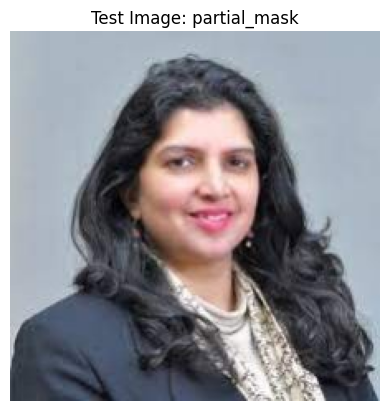

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction: without_mask


In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# Load the image
image_path = '/content/ss1.jpeg'  # Correct the image path
image = load_img(image_path, target_size=(224, 224))  # Resize image to (224, 224) as expected by the model

# Display the image
plt.imshow(image)
plt.axis('off')
plt.title(f"Test Image: partial_mask")
plt.show()

# Preprocess the image
image = img_to_array(image)  # Convert the image to a numpy array
image = image / 255.0  # Normalize the image to [0, 1]
image = np.expand_dims(image, axis=0)  # Add the batch dimension: (1, 224, 224, 3)

# Make the prediction using model2
prediction = model2.predict(image)  # Prediction is a 3-element array of probabilities

# Get the predicted class by finding the index of the maximum probability
predicted_class = np.argmax(prediction, axis=1)[0]

# Display the result based on the predicted class
if predicted_class == 0:
    print("Prediction: partial_mask")
elif predicted_class == 1:
    print("Prediction: with_mask")
else:
    print("Prediction: without_mask")


In [41]:
%cd/co


/root


In [ ]:
#Model 2
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Set the path to the test directory
test_dir = 'dataset/test'  # Adjust the path as necessary

# Select a random image from the test directory
random_image_path = np.random.choice(os.listdir(test_dir))  # Randomly select an image
full_image_path = os.path.join(test_dir, random_image_path)

# Load the image
image = load_img(full_image_path, target_size=(150, 150))  # Load the image with the same target size
plt.imshow(image)
plt.axis('off')
plt.title(f"Random Test Image: {random_image_path}")
plt.show()

# Preprocess the image
image = img_to_array(image)  # Convert the image to a numpy array
image = image / 255.0  # Normalize the image
image = np.expand_dims(image, axis=0)  # Reshape to (1, 150, 150, 3)

# Make the prediction
prediction = model2.predict(image)
predicted_class = (prediction[0][0] > 0.5).astype(int)  # Convert to binary class (0 or 1)

# Display the result
if predicted_class == 0:
    print("Prediction: Class 0")
elif predicted_class == 1:
    print("Prediction: Class 1")
else:
    print("Prediction: Class 2")


# Part-B [5-Marks]

## Visualization [2 Marks]

Define a function 'get_img_array' that takes two parameters image path and target size. It returns the converted image to array.

Display this image.

Hint:: Consider AST3 for visualization.

In [ ]:
# YOUR CODE HERE

## Instantiating a model that returns "layer activations"

Hint:: Use 'keras.model' to define this model.

In [ ]:
# Instantiating a model that returns "layer activations"
# YOUR CODE HERE

Once the activation model is defined, predict the image tensor created using this model.

In [ ]:
# Compute layer activations
# YOUR CODE HERE

## Visualize first feature map

In [ ]:
# Visualise activation

# YOUR CODE HERE

## Visualize feature map after each layer

In [ ]:
# YOUR CODE HERE

Successive feature maps are of smaller dimensions but scaled to be the same size during visualization.

## Visualise all the feature maps of all the layers

In [ ]:
# Post-processing code - only visualizaton
# Visualizing every channel in every intermediate activation
# YOUR CODE HERE
# YOUR CODE HERE

# ConvNet Filters [1 Mark]

## Print the names of  conv and MaxPooling layers.

Hint:: 'model2.layer'

In [ ]:
# YOUR CODE HERE

## Create a feature extractor model

In [ ]:
# YOUR CODE HERE
# Check the model summary
# YOUR CODE HERE

## Use the feature extractor model to extract feature out of the image tensor.

In [ ]:
# YOUR CODE HERE

Define a function 'compute_loss' it takes two arguments, image and filter index. It returns the filter activation using 'tf.reduce_mean'.

In [ ]:
# YOUR CODE HERE

## Loss maximization via stochastic gradient ascent.
Define a function to implement this step.

In [ ]:
@tf.function
# YOUR CODE HERE

## Define a function to generate filter visualizations

This function uses gradient ascent to generate an image that maximizes the activation of a given filter in a CNN.

In [ ]:
# YOUR CODE HERE

## Define a function to convert a tensor into a valid image

In [ ]:
# YOUR CODE HERE

Generate a list of images, where each image in the list represents the activation pattern of a particular filter in the given layer.

In [ ]:
# Post processing- Just visualization
# Generating a grid of all filter response patterns in a layer

# YOUR CODE HERE

Stitch together all the images in the 'all_images' list and save the resulting image as a PNG file. The resulting image shows a grid of all the filter activation patterns in the given layer.

In [ ]:
# YOUR CODE HERE

Display the images

In [ ]:
# YOUR CODE HERE

All the steps discussed in visualization section can be easily understood from AST3.

## Transfer Learning [2 Marks]

Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

For eg. Using VGG16, we remove the last layer which takes a probability for each of the 1000 classes in the ImageNet and replaces it with a layer that takes 3 probabilities in our case.

### Use the pre-trained models ([VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16) or [ResNet50](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50))

* Load the pre-trained model
* Fit and evaluate the data

Hint: [How to use pre-trained model](https://drive.google.com/file/d/1d5WSWQmdVYYcJhvhMcZMoK5-BPOC1B_7/view?usp=sharing)

#### Expected accuracy: More than 90%

Task-flow
* Initialize the network with the weights of Imagenet
* Fine tune the network by modifying fully connected layers.
* Re-train the model with our problem data

#### VGG16

Define the pre-trained vgg model with dense layers.

Display the model summary

In [ ]:
# YOUR CODE HERE

In [ ]:
# Compile the model
# YOUR CODE HERE

Fit the data to the model

In [ ]:
# YOUR CODE HERE

Plot training and validation loss

In [ ]:
# YOUR CODE HERE

#### ResNet50

Define the pre-trained resnet model with dense layers

In [ ]:
# YOUR CODE HERE

Fit the data to the model

In [ ]:
# YOUR CODE HERE

Plot the validation and training loss

In [ ]:
# YOUR CODE HERE

### Capture the live image using the below code cell and predict

In [ ]:
#@title Capture the photo
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

After executing above cell and capturing the photo, load the captured photo and predict with model.

**Note:**
* Convert the image to numpy array and resize to the shape which model accept.
* Extend the dimension (to 4-D shape) of an image, as the model is trained on a batch of inputs.

In [ ]:
# Make a prediction using model that is created by making use of transer learning technique
# YOUR CODE HERE

### Report Analysis

- Compare the accuracies for the Pre-trained vs CNN models
- Which model detects the mask/no mask/ partial mask more accurately with the live pictures?
- What process was followed to tune the hyperparameters?